## We have the dataset, now we focus on the preprocessing layers.

# Data Loading and Augmentation

- Added Loading Methods, Data is loaded using image paths in Drive
- Added Data Augmentation Methods, Prefetched and Parallel Calls using tf.Data.AUTOTUNE

Need to work on
- Imbalanced Classes - Class imabalances are present a lot, applying a RandomUnderSampler for the Majority Class

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import os


# from glob import glob
# %matplotlib inline

In [ ]:
# !nvidia-smi

In [ ]:
# base_image_dir_1 = '/content/drive/MyDrive/Project-Work/'
# # base_image_dir_2 = '/content/drive/MyDrive/Project-Work/test'
# retina_df = pd.read_csv(os.path.join(base_image_dir_1, '/content/drive/MyDrive/Project-Work/trainLabels/trainLabels.csv'))

In [ ]:
# retina_df['PatientId'] = retina_df['image'].map(lambda x: x.split('_')[0])

# retina_df['path'] = retina_df['image'].map(lambda x: os.path.join(base_image_dir_1,
#                                                                   'train_01_resized150{}.jpeg'.format(x)))

In [ ]:
# pd.set_option('display.max_colwidth', None)

In [ ]:
# retina_df['path'].head()

In [ ]:
# retina_df['exists'] = retina_df['path'].map(os.path.exists)
# print(retina_df['exists'].sum(), 'images found of', retina_df.shape[0], 'total')

In [ ]:
# from tensorflow.keras.utils import to_categorical

# retina_df['eye'] = retina_df['image'].map(lambda x: 1 if x.split('_')[-1]=='left' else 0)
# # keeping the data as one hot encodes rather than 1 2 3 4
# retina_df.dropna(inplace = True)
# retina_df = retina_df[retina_df['exists']]
# retina_df

In [ ]:
# retina_df[['level', 'eye']].hist(figsize = (10, 5))

In [ ]:
# file_path = "/content/drive/MyDrive/Project-Work/retina_df.json"
# retina_df.to_json(file_path)

#Loading the Dataframe, to save memory

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline
from tensorflow.keras.utils import to_categorical

In [ ]:
retina_df = pd.read_json("/content/drive/MyDrive/Project-Work/retina_df.json")
retina_df['level_cat'] = retina_df['level'].map(lambda x: to_categorical(x, 1+retina_df['level'].max()))
retina_df

,image,level,PatientId,path,exists,eye,level_cat
10,19_left,0,19,/content/drive/MyDrive/Project-Work/train_01_r...,True,1,"[1.0, 0.0, 0.0, 0.0, 0.0]"
11,19_right,0,19,/content/drive/MyDrive/Project-Work/train_01_r...,True,0,"[1.0, 0.0, 0.0, 0.0, 0.0]"
12,20_left,0,20,/content/drive/MyDrive/Project-Work/train_01_r...,True,1,"[1.0, 0.0, 0.0, 0.0, 0.0]"
13,20_right,0,20,/content/drive/MyDrive/Project-Work/train_01_r...,True,0,"[1.0, 0.0, 0.0, 0.0, 0.0]"
14,21_left,0,21,/content/drive/MyDrive/Project-Work/train_01_r...,True,1,"[1.0, 0.0, 0.0, 0.0, 0.0]"
...,...,...,...,...,...,...,...
23053,29113_right,0,29113,/content/drive/MyDrive/Project-Work/train_01_r...,True,0,"[1.0, 0.0, 0.0, 0.0, 0.0]"
23054,29114_left,2,29114,/content/drive/MyDrive/Project-Work/train_01_r...,True,1,"[0.0, 0.0, 1.0, 0.0, 0.0]"
23055,29114_right,2,29114,/content/drive/MyDrive/Project-Work/train_01_r...,True,0,"[0.0, 0.0, 1.0, 0.0, 0.0]"
23056,29117_left,0,29117,/content/drive/MyDrive/Project-Work/train_01_r...,True,1,"[1.0, 0.0, 0.0, 0.0, 0.0]"


In [ ]:
from sklearn.model_selection import train_test_split
rr_df = retina_df[['PatientId', 'level']].drop_duplicates()

#Splitting based on patient id
train_ids, valid_ids = train_test_split(rr_df['PatientId'],
                                   test_size = 0.25,
                                   random_state = 42,
                                   stratify = rr_df['level'])

# If patient id is present in retina_df
raw_train_df = retina_df[retina_df['PatientId'].isin(train_ids)]
valid_df = retina_df[retina_df['PatientId'].isin(valid_ids)]
print('train', raw_train_df.shape[0], 'validation', valid_df.shape[0])

train 6482 validation 2292


array([[<Axes: title={'center': 'level'}>,
        <Axes: title={'center': 'eye'}>]], dtype=object)

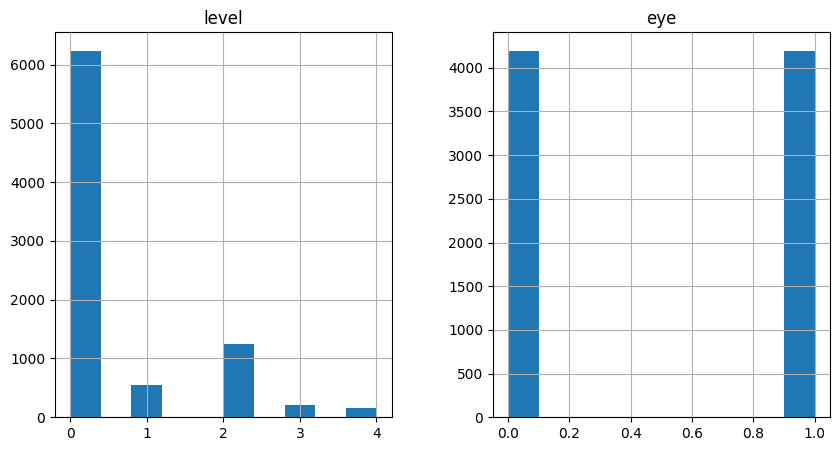

In [ ]:
retina_df[['level', 'eye']].hist(figsize = (10, 5))

In [ ]:
retina_df.dtypes

image        object
level         int64
PatientId     int64
path         object
exists         bool
eye           int64
level_cat    object
dtype: object

In [ ]:
# retina_df.to_csv('/content/drive/MyDrive/Project-Work/retina_df.csv')

##Sampling the Majority Class for Future Ops

Old Data Size: 6482 New Data Size: 3318


array([[<Axes: title={'center': 'level'}>,
        <Axes: title={'center': 'eye'}>]], dtype=object)

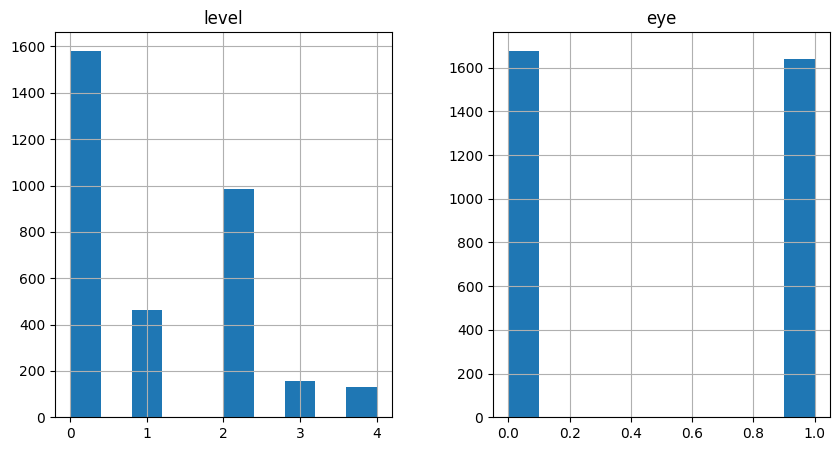

In [ ]:
from sklearn.utils import resample

maj_class = raw_train_df[raw_train_df['level'] == 0]

min_class_1 = raw_train_df[raw_train_df['level'] == 1]
min_class_2 = raw_train_df[raw_train_df['level'] == 2]
min_class_3 = raw_train_df[raw_train_df['level'] == 3]
min_class_4 = raw_train_df[raw_train_df['level'] == 4]

n_samples_per_class=len(maj_class)//3

#Downsampling by half the amount
majority_downsampled = resample(maj_class,
                                replace = False,
                                n_samples = n_samples_per_class,
                                random_state = 42)

downsampled_df = pd.concat([majority_downsampled, min_class_1, min_class_2, min_class_3, min_class_4])
downsampled_df = downsampled_df.sample(frac = 1, random_state = 42)
print('Old Data Size:', raw_train_df.shape[0], 'New Data Size:', downsampled_df.shape[0])
downsampled_df[['level', 'eye']].hist(figsize = (10, 5))

In [ ]:
# create a fraction of the downsampled_df and try it out


In [ ]:
# train_df = downsampled_df.sample(frac = 0.5, random_state = 42)
# print('New Data Size:', train_df.shape[0], 'Old Size:', raw_train_df.shape[0])
# train_df[['level', 'eye']].hist(figsize = (10, 5))

### Oversampling so that there are enough features to learn

Old Data Size: 6482 New Data Size: 7910


array([[<Axes: title={'center': 'level'}>,
        <Axes: title={'center': 'eye'}>]], dtype=object)

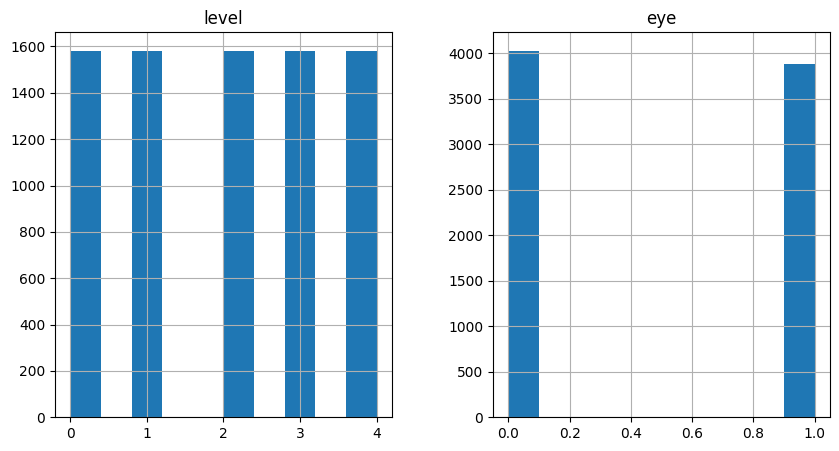

In [ ]:
maj_class = downsampled_df[downsampled_df['level'] == 0]

min_class_1 = downsampled_df[downsampled_df['level'] == 1]
min_class_2 = downsampled_df[downsampled_df['level'] == 2]
min_class_3 = downsampled_df[downsampled_df['level'] == 3]
min_class_4 = downsampled_df[downsampled_df['level'] == 4]

n_samples_per_class = len(maj_class)

oversampled_min_class_1 = resample(min_class_1,
                                   replace=True,
                                   n_samples=n_samples_per_class,
                                   random_state=42)

oversampled_min_class_2 = resample(min_class_2,
                                   replace=True,
                                   n_samples=n_samples_per_class,
                                   random_state=42)

oversampled_min_class_3 = resample(min_class_3,
                                   replace=True,
                                   n_samples=n_samples_per_class,
                                   random_state=42)

oversampled_min_class_4 = resample(min_class_4,
                                   replace=True,
                                   n_samples=n_samples_per_class,
                                   random_state=42)

oversampled_df = pd.concat([majority_downsampled, oversampled_min_class_1, oversampled_min_class_2, oversampled_min_class_3, oversampled_min_class_4])
oversampled_df = oversampled_df.sample(frac = 1, random_state = 42)
print('Old Data Size:', raw_train_df.shape[0], 'New Data Size:', oversampled_df.shape[0])
oversampled_df[['level', 'eye']].hist(figsize = (10, 5))

## Check if there are any corrupt data present in between

In [ ]:
import os
from PIL import Image
import numpy as np

# Define a function to load and preprocess images
def load_image(file_path, image_size):
    try:
        # Open and preprocess the image
        img = Image.open(file_path)
        img = img.resize(image_size)
        img_array = np.array(img) / 255.0  # Normalize pixel values
        return img_array, None
    except Exception as e:
        return None, file_path  # Return file path of corrupted image

# Define parent directory containing images
parent_directory = '/content/drive/MyDrive/Project-Work'

# Define image size for resizing
image_size = (224, 224)

# Iterate through files in the parent directory
corrupted_files = []
for filename in os.listdir(parent_directory):
    if filename.endswith('.jpeg'):
        file_path = os.path.join(parent_directory, filename)
        img_array, corrupted_path = load_image(file_path, image_size)
        if img_array is not None:
            # If theu image was loaded successfully, proceed with training
            # Here you would feed the image to your model and pdate weights
            pass
        else:
            # If the image could not be loaded, add its file path to the list of corrupted files
            corrupted_files.append(corrupted_path)

# Print list of corrupted files
print("Corrupted files:")
for file_path in corrupted_files:
    print(file_path)



## Data Augmentation

In [ ]:
import tensorflow as tf
from keras import backend as K
import numpy as np
from  tensorflow.keras.applications.efficientnet_v2 import preprocess_input
IMG_SIZE = (150, 150)
def tf_image_loader(out_size,
                      horizontal_flip = True,
                      vertical_flip = False,
                     random_brightness = True,
                     random_contrast = True,
                    random_saturation = True,
                    random_hue = True,
                      color_mode = 'rgb',
                       on_batch = False,
                    preprocess = preprocess_input):

    def _func(X):
      '''
      Performs Image Augmentation- Augmentation Considerations :
        Horizontal Flip, Vertical Flip, Random_Brightness, Random_Saturation, Random_Hue
      Args
      X - Train Images
      '''
      with tf.name_scope('image_augmentation'):
            with tf.name_scope('input'):
                X = tf.image.decode_jpeg(tf.io.read_file(X), channels = 3 if color_mode == 'rgb' else 0)
                X = tf.image.resize(X, out_size)
            with tf.name_scope('augmentation'):
                if horizontal_flip:
                    X = tf.image.random_flip_left_right(X)
                if vertical_flip:
                    X = tf.image.random_flip_up_down(X)
                if random_brightness:
                    X = tf.image.random_brightness(X, max_delta = 0.5)
                if random_saturation:
                    X = tf.image.random_saturation(X, lower = 0.75, upper = 1.5)
                if random_hue:
                    X = tf.image.random_hue(X, max_delta = 0.25)
                if random_contrast:
                    X = tf.image.random_contrast(X, lower = 0.75, upper = 1.5)
                return preprocess(X)
    if on_batch:
        # we are meant to use it on a batch
        def _batch_func(X, y):
            return tf.map_fn(_func, X, fn_output_signature=tf.float32), y
        return _batch_func
    else:
        # we apply it to everything
        def _all_func(X, y):
            return _func(X), y
        return _all_func

In [ ]:
def tf_augmentor(out_size,
                 intermediate_trans = 'crop',
                 intermediate_size = (640, 640),
                 batch_size = 32,
                   horizontal_flip = True,
                  vertical_flip = False,
                 random_brightness = False,
                 random_contrast = True,
                 random_saturation = True,
                    random_hue = True,
                 preprocess = preprocess_input,
                  color_mode = 'rgb',
                   crop_probability = 0.5,
                   rotation_range = 40):



    load_ops = tf_image_loader(out_size = intermediate_size,
                               horizontal_flip=horizontal_flip,
                               vertical_flip=vertical_flip,
                               random_brightness = random_brightness,
                               random_contrast = random_contrast,
                               random_saturation = random_saturation,
                               random_hue = random_hue,
                               color_mode = color_mode,
                               on_batch=False)
    random_rotation_layer = tf.keras.layers.RandomRotation(rotation_range/180*np.pi)
    crop_height, crop_width = intermediate_size
    random_crop_layer = tf.keras.layers.RandomCrop(crop_height, crop_width)

    def batch_ops(X, y, training = True):
      '''
      Performs rotation, cropping and resizing operations on the batch

      Args:
      X = Train Data - Images (640 X 640)
      y = Train Labels
      '''
      with tf.name_scope('transformation'):
            if rotation_range > 0:
              X = random_rotation_layer(X)
            if crop_probability>0:
              X = random_crop_layer(X)
            #Apply intermediate transformations based on specific method
            if intermediate_trans == 'scale':
              X = tf.image.resize(X, out_size)
            elif intermediate_trans == 'crop':
              X = tf.image.resize_with_crop_or_pad(X, out_size[0], out_size[1])
            else:
              raise ValueError('Invalid Operation {}'.format(intermediate_trans))

      return X, y

    def _create_pipeline(in_ds):
      '''
      Pipeline for prefetching and batching the data

      Args:
        in_ds - tf.data.Dataset : input dataset
      Returns:
        tf.data.Dataset: Processed pipeline
      '''
      if not isinstance(in_ds, tf.data.Dataset):
          raise ValueError("Input dataset must be a TensorFlow Dataset object")
      batch_ds = in_ds.map(load_ops, num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size)
      return batch_ds.map(batch_ops).prefetch(tf.data.AUTOTUNE)

    return _create_pipeline

In [ ]:
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# import numpy as np
# from tqdm import tqdm

# def tf_augmentor(out_size,
#                  intermediate_size=(512, 512),  #The intermediate size is supposed to be 640x640. While it should not work, there is some error that is causing it to occur.
#                  crop_probability=0.0,
#                  intermediate_trans='crop',
#                  batch_size=32,
#                  horizontal_flip=True,
#                  vertical_flip=False,
#                  random_brightness=False,
#                  random_contrast=True,
#                  random_saturation=True,
#                  random_hue=True,
#                  preprocess=preprocess_input,
#                  color_mode='rgb',
#                  rotation_range=20,
#                  is_training = True):

#     load_ops = tf_image_loader(out_size=intermediate_size,
#                                horizontal_flip=horizontal_flip,
#                                vertical_flip=vertical_flip,
#                                random_brightness=random_brightness,
#                                random_contrast=random_contrast,
#                                random_saturation=random_saturation,
#                                random_hue=random_hue,
#                                color_mode=color_mode,
#                                on_batch=False)

#     random_rotation_layer = tf.keras.layers.RandomRotation(rotation_range / 180 * np.pi)

#     def batch_ops(X, y):
#         '''
#         Performs rotation, cropping and resizing operations on the batch

#         Args:
#         X = Train Data - Images (640 X 640)
#         y = Train Labels
#         '''
#         with tf.name_scope('transformation'):
#             if rotation_range > 0.0:
#                 X = random_rotation_layer(X)

#             if crop_probability > 0.0:
#                 X = tf.keras.layers.RandomCrop(intermediate_size)(X)

#             # This part of the code is causing some error
#             # Apply intermediate transformations based on specific method
#             if intermediate_trans == 'scale':
#                 X = tf.image.resize(X, out_size)
#             elif intermediate_trans == 'crop':
#                 X = tf.image.resize_with_crop_or_pad(X, out_size[0], out_size[1])
#             else:
#                 raise ValueError('Invalid Operation {}'.format(intermediate_trans))
#         return X, y

#     def _create_pipeline(in_ds):
#         '''
#         Pipeline for prefetching and batching the data

#         Args:
#           in_ds - tf.data.Dataset : input dataset
#           is_training - Boolean: Indicates whether the dataset is for training or not
#         Returns:
#           tf.data.Dataset: Processed pipeline
#         '''

#         if not isinstance(in_ds, tf.data.Dataset):
#             raise ValueError("Input dataset must be a TensorFlow Dataset object")

#         # # For showing up progress on the code. Need to update my implementation on the tqdm
#         total_elements = len(in_ds)
#         progress_bar = tqdm(total=total_elements, desc='Processing dataset', unit='samples')

#         batch_ds = in_ds.map(load_ops, num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size)

#         if is_training:  # Apply sampling operations only during training
#             # Extract images and labels
#             images = []
#             labels = []
#             for img, label in batch_ds:
#                 images.append(img.numpy())
#                 labels.append(label.numpy())
#             # Convert to numpy arrays
#             images = np.concatenate(images, axis=0)
#             labels = np.concatenate(labels, axis=0)

#             int_label = np.argmax(labels, axis = 1)

#             # num_majority = (np.sum(int_label == 0))//2

#             # sampling_strategy = {0:num_majority}

#             # # Undersample majority class
#             # undersampler = RandomUnderSampler(sampling_strategy= sampling_strategy)  # Reduce the majority class by at least half
#             # images_undersampled, labels_undersampled = undersampler.fit_resample(images.reshape(-1, np.prod(IMG_SIZE + (3,))), labels)

#             #Print the shape of the image here
#             print('Image Shape', images.shape)
#             # Oversample minority class
#             smote = SMOTE(sampling_strategy='minority', random_state = 42)
#             image_resample_size = images.reshape(-1, np.prod(IMG_SIZE + (3,)))
#             images_resampled, labels_resampled = smote.fit_resample(image_resample_size, labels)


#             # Convert resampled images and labels back to TensorFlow tensors
#             images_resampled = tf.convert_to_tensor(images_resampled.reshape(-1, *IMG_SIZE, 3), dtype=tf.float32)
#             labels_resampled = tf.convert_to_tensor(labels_resampled, dtype=tf.float32)

#             # Create a TensorFlow Dataset from resampled images and labels
#             resampled_dataset = tf.data.Dataset.from_tensor_slices((images_resampled, labels_resampled))

#             #Cache the results since there is a possible access to RAM again
#             resampled_dataset = resampled_dataset.cache()

#             return resampled_dataset.map(batch_ops).prefetch(tf.data.AUTOTUNE)
#         else:
#             # If not training, simply map the batch operations and prefetch
#             return batch_ds.map(batch_ops).prefetch(tf.data.AUTOTUNE)


#     return _create_pipeline



In [ ]:
def preprocess_labels(label_list):
  return tf.convert_to_tensor(label_list, dtype=tf.float32)

def flow_from_dataframe(idg, in_df, path_col, y_col, shuffle=True, color_mode='rgb', target_dist = None):
    paths = in_df[path_col].values
    labels = in_df[y_col].apply(preprocess_labels).tolist()

    # Convert string paths to tensors
    paths = tf.convert_to_tensor(paths, dtype=tf.string)
    labels = tf.convert_to_tensor(labels, dtype=tf.float32)

    # Create a TensorFlow Dataset from the paths and labels
    dataset = tf.data.Dataset.from_tensor_slices((paths, labels))
    # Specify the output shapes when creating the dataset
    output_shapes = (tf.TensorShape([]), tf.TensorShape([5]))

    # Shuffle the dataset if specified
    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(paths))

    # Apply the image data generator pipeline
    dataset = idg(dataset)

    return dataset

## Dataset Generation - Big Moment!

In [ ]:
batch_size = 32
core_idg = tf_augmentor(out_size = (512,512),
                        color_mode = 'rgb',
                        vertical_flip = True,
                        crop_probability=0.3,# crop doesn't work yet
                        batch_size = batch_size)

valid_idg = tf_augmentor(out_size = (512, 512), color_mode = 'rgb',
                         crop_probability=0.0,
                         intermediate_trans = 'scale',
                         horizontal_flip = False,
                         vertical_flip = False,
                         random_brightness = False,
                         random_contrast = False,
                         random_saturation = False,
                         random_hue = False,
                         rotation_range = 0,
                         batch_size = batch_size)
                        #is_training = False)

train_gen = flow_from_dataframe(core_idg, oversampled_df,
                             path_col = 'path',
                            y_col = 'level_cat')

valid_gen = flow_from_dataframe(valid_idg, valid_df,
                             path_col = 'path',
                            y_col = 'level_cat',
                                shuffle = False,) # we can use much larger batches for evaluation

### Validation Set

Data augmentation is not done for this

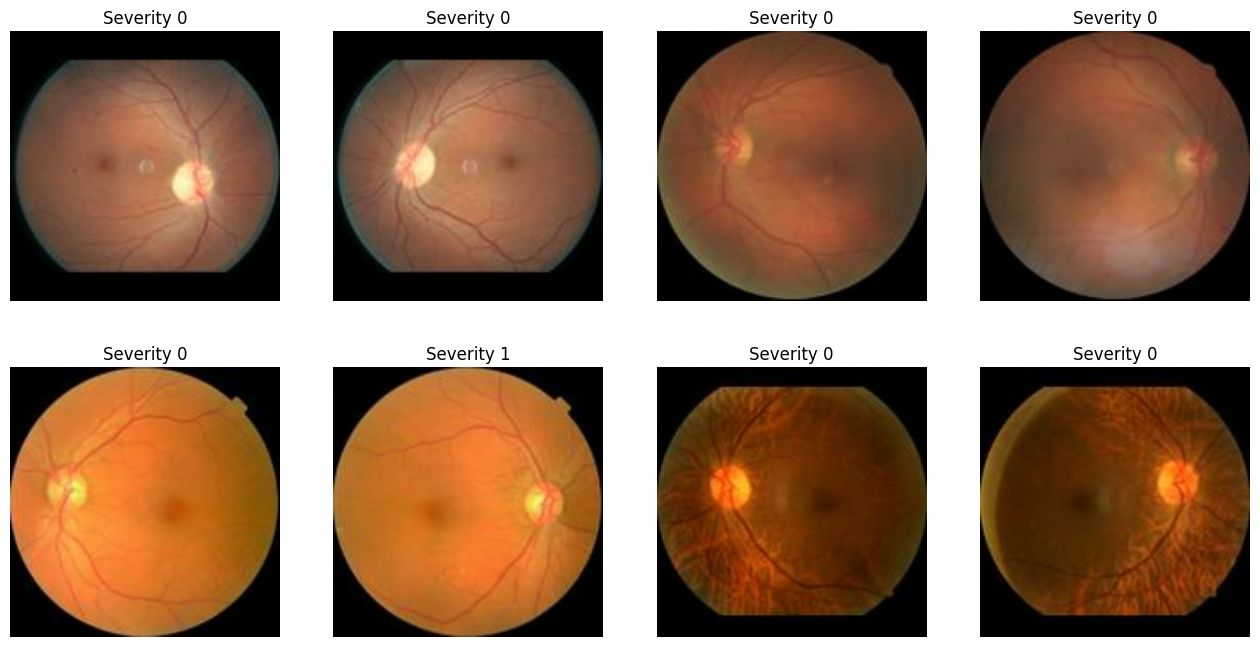

In [ ]:
valid_iter = iter(valid_gen)
v_x, v_y = next(valid_iter)
fig, m_axs = plt.subplots(2, 4, figsize = (16, 8))
for (c_x, c_y, c_ax) in zip(v_x, v_y, m_axs.flatten()):
    c_ax.imshow(np.clip(c_x, 0, 255).astype(np.uint8))
    c_ax.set_title('Severity {}'.format(np.argmax(c_y, -1)))
    c_ax.axis('off')

### Training Set

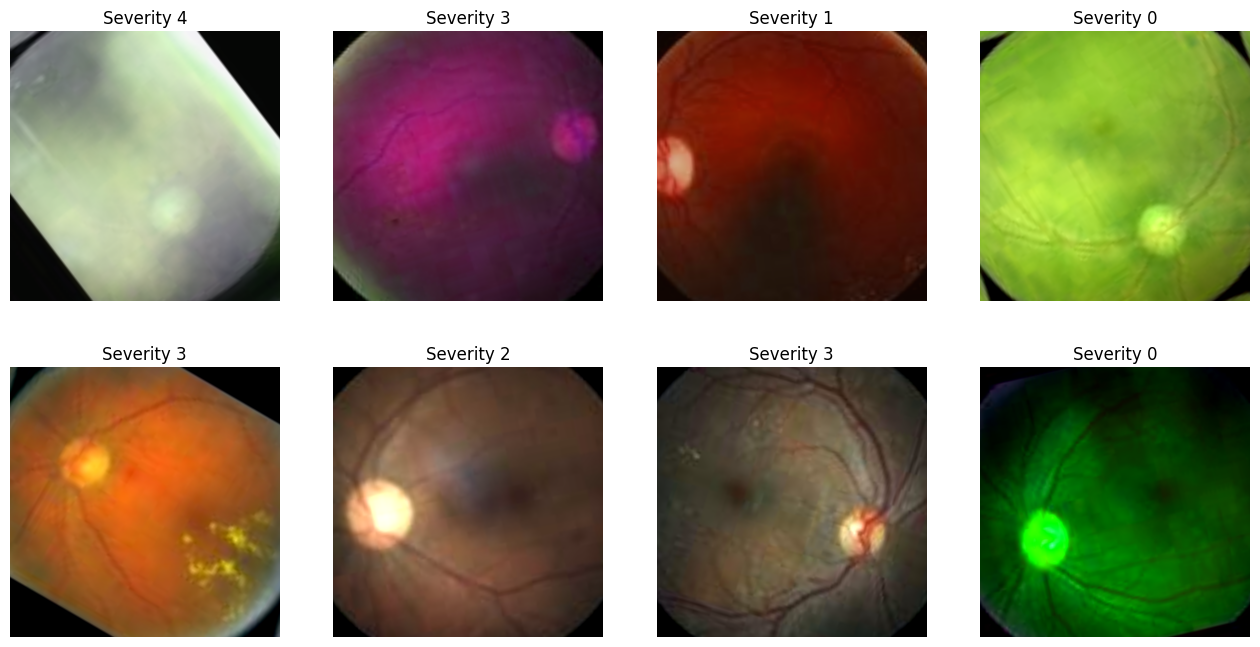

In [ ]:
train_iter = iter(train_gen)
t_x, t_y = next(train_iter)
fig, m_axs = plt.subplots(2, 4, figsize = (16, 8))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(np.clip(c_x, 0, 255).astype(np.uint8))
    c_ax.set_title('Severity {}'.format(np.argmax(c_y, -1)))
    c_ax.axis('off')

In [ ]:
t_x.shape, t_y.shape

## Model and Experimentation

**Model 0 : EfficientNet_V2S (Classes Unbalanced, Image Augmented)** - Done using V100 GPU (High Ram) (Dataset : 8294 images)
  - top_2_accuracy
  - Precision: 0.78  0.0 0.33 0.54 0.63
  - F1 :       0.90  0.0 0.32 0.22 0.21
  - Recall :   0.84  0.0 0.32 0.31 0.37

In [ ]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 8.4 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dropout, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetV2S  # Import EfficientNetV2S or other variant
from tensorflow.keras.layers import BatchNormalization
# from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import tensorflow_addons as tfa


tf.keras.mixed_precision.set_global_policy('mixed_float16')

in_lay = Input(t_x.shape[1:])  # Specify the input shape here

base_pretrained_model = EfficientNetV2S(weights='imagenet', include_top=False, input_shape=t_x.shape[1:])  # Specify input shape here
base_pretrained_model.trainable = False

pt_features = base_pretrained_model(in_lay)

gap_features = GlobalAveragePooling2D()(pt_features)

gap_dr = Dropout(0.25)(gap_features)
dense_layer = Dense(128, activation='relu')(gap_dr)
dr_steps = Dropout(0.25)(dense_layer)

out_layer = Dense(5, activation='softmax', name = "output")(dr_steps)

# Create the model
retina_model = Model(inputs=in_lay, outputs=out_layer)


#Let's change to MSE Loss for Getting
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=False)

# def top_2_accuracy(in_gt, in_pred):
#     return top_k_categorical_accuracy(in_gt, in_pred, k=2)

# Compile the model
retina_model.compile(optimizer='adam',
                      loss= loss_fn,
                      metrics=['categorical_accuracy', tfa.metrics.CohenKappa(num_classes=5)])

# Print model summary
retina_model.summary()

82420632/82420632 [==============================] - 0s 0us/step
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 efficientnetv2-s (Function  (None, 16, 16, 1280)      20331360  
 al)                                                             
                                                                 
 global_average_pooling2d_3  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_6 (Dropout)         (None, 1280)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               163968    
                                                            

In [ ]:
base_pretrained_model.summary()

Model: "efficientnetv2-s"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 rescaling_2 (Rescaling)     (None, 512, 512, 3)          0         ['input_6[0][0]']             
                                                                                                  
 stem_conv (Conv2D)          (None, 256, 256, 24)         648       ['rescaling_2[0][0]']         
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 256, 256, 24)         96        ['stem_conv[0][0]']           
 n)                                                                                

In [ ]:
train_gen = train_gen.repeat()

In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau

weight_path="{}_weights.best.hdf5".format('retina')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1,
                             save_best_only=True, mode='min', save_weights_only = True)

# sampler = SampleBalancingCallback(train_gen, batch_size = batch_size)

reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=8, verbose=1, mode='auto', cooldown=5, min_lr=0.00001)
early = EarlyStopping(monitor="val_loss",
                      mode="min",
                      patience=6) # probably needs to be more patient
callbacks_list = [checkpoint, early, reduceLROnPlat]

In [ ]:
!rm -rf ~/.keras # clean up before starting training

In [ ]:
%%time
history_1 = retina_model.fit(train_gen,
                           steps_per_epoch = oversampled_df.shape[0]//batch_size,
                           validation_data = valid_gen,
                           validation_steps = valid_df.shape[0]//batch_size,
                              epochs = 10,
                              callbacks = callbacks_list,
                             workers = 0, # tf-generators are not thread-safe
                             use_multiprocessing=False,
                             max_queue_size = 0,
                            verbose = 1
                            ).history

Epoch 1/10
247/247 [==============================] - ETA: 0s - loss: 1.4562 - categorical_accuracy: 0.3443 - cohen_kappa: 0.1803
Epoch 1: val_loss improved from inf to 1.59068, saving model to retina_weights.best.hdf5
247/247 [==============================] - 458s 2s/step - loss: 1.4562 - categorical_accuracy: 0.3443 - cohen_kappa: 0.1803 - val_loss: 1.5907 - val_categorical_accuracy: 0.1637 - val_cohen_kappa: 0.0435 - lr: 0.0010
Epoch 2/10
247/247 [==============================] - ETA: 0s - loss: 1.3832 - categorical_accuracy: 0.3808 - cohen_kappa: 0.2260
Epoch 2: val_loss improved from 1.59068 to 1.29663, saving model to retina_weights.best.hdf5
247/247 [==============================] - 432s 2s/step - loss: 1.3832 - categorical_accuracy: 0.3808 - cohen_kappa: 0.2260 - val_loss: 1.2966 - val_categorical_accuracy: 0.4441 - val_cohen_kappa: 0.0946 - lr: 0.0010
Epoch 3/10
247/247 [==============================] - ETA: 0s - loss: 1.3591 - categorical_accuracy: 0.3967 - cohen_kappa: 0

In [ ]:
retina_model.save('retina_s_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


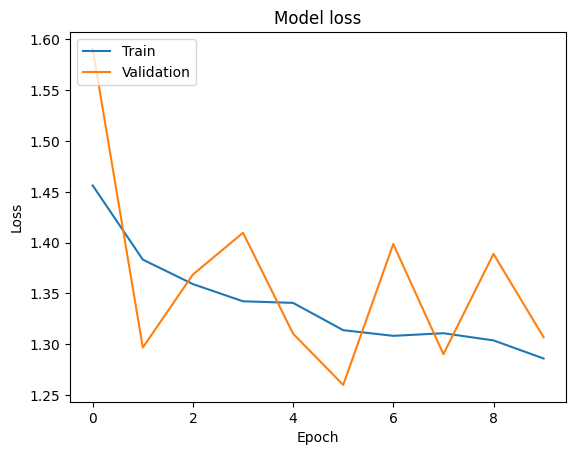

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history_1['loss'])

plt.plot(history_1['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
from tqdm import tqdm_notebook
# fresh valid gen
valid_gen = flow_from_dataframe(valid_idg, valid_df,
                             path_col = 'path',
                            y_col = 'level_cat')
vbatch_count = (valid_df.shape[0]//batch_size-1)

out_size = vbatch_count*batch_size

test_X = np.zeros((out_size,)+t_x.shape[1:], dtype = np.float32)
test_Y = np.zeros((out_size,)+t_y.shape[1:], dtype = np.float32)

for i, (c_x, c_y) in zip(tqdm_notebook(range(vbatch_count)),
                         valid_gen):
    j = i*batch_size
    test_X[j:(j+c_x.shape[0])] = c_x
    test_Y[j:(j+c_x.shape[0])] = c_y

<ipython-input-75-2820fbb8aaf2>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, (c_x, c_y) in zip(tqdm_notebook(range(vbatch_count)),


  0%|          | 0/70 [00:00<?, ?it/s]

In [ ]:
# Retrieve saved best
retina_model.load_weights('/content/retina_weights.best.hdf5')

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
pred_y = retina_model.predict(test_X, batch_size = 32, verbose = True)

pred_Y_cat = np.argmax(pred_y, -1)
test_Y_cat = np.argmax(test_Y, -1)
print('Accuracy on Test Data: %2.2f%%' % (accuracy_score(test_Y_cat, pred_Y_cat)))
print(classification_report(test_Y_cat, pred_Y_cat))

70/70 [==============================] - 13s 181ms/step
Accuracy on Test Data: 0.49%
              precision    recall  f1-score   support

           0       0.77      0.59      0.67      1595
           1       0.11      0.29      0.16       188
           2       0.20      0.13      0.16       349
           3       0.19      0.38      0.26        65
           4       0.13      0.51      0.21        43

    accuracy                           0.49      2240
   macro avg       0.28      0.38      0.29      2240
weighted avg       0.60      0.49      0.53      2240



<Axes: >

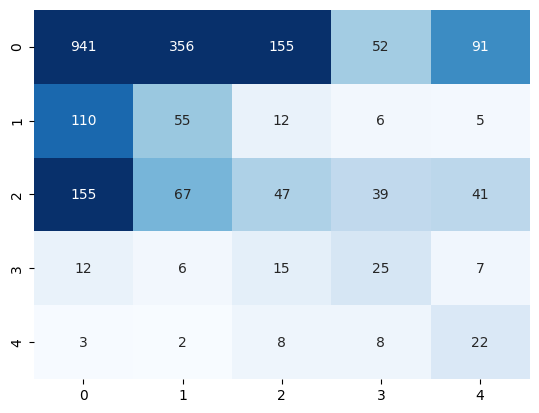

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_Y_cat, pred_Y_cat),
            .
            annot=True, fmt="d", cbar = False, cmap = plt.cm.Blues, vmax = test_X.shape[0]//16)

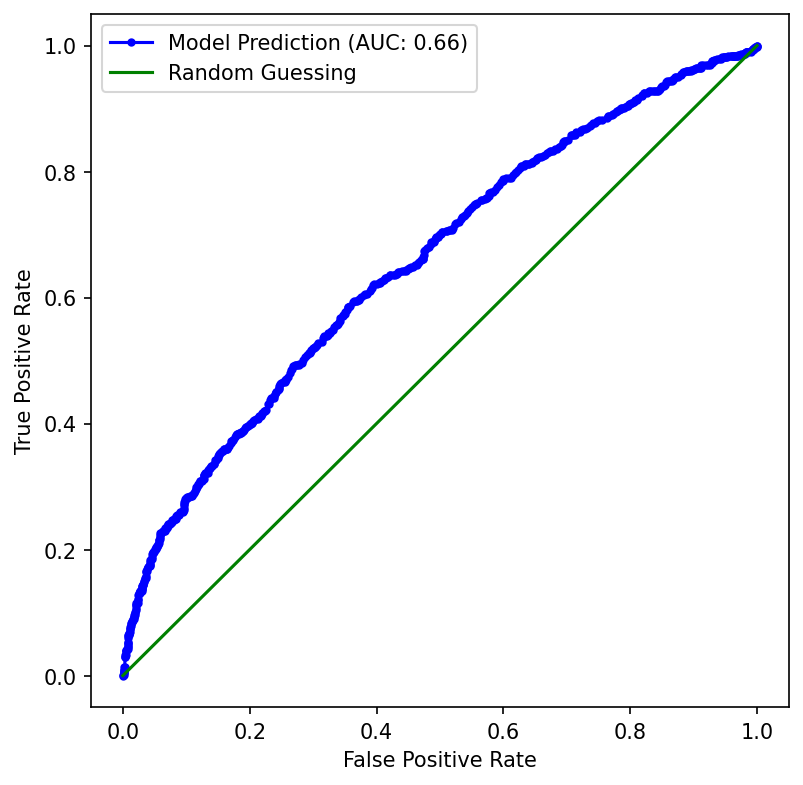

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
sick_vec = test_Y_cat>0
sick_score = np.sum(pred_y[:,1:],1)
fpr, tpr, _ = roc_curve(sick_vec, sick_score)
fig, ax1 = plt.subplots(1,1, figsize = (6, 6), dpi = 150)
ax1.plot(fpr, tpr, 'b.-', label = 'Model Prediction (AUC: %2.2f)' % roc_auc_score(sick_vec, sick_score))
ax1.plot(fpr, fpr, 'g-', label = 'Random Guessing')
ax1.legend()
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate');

## EfficientNetV2_B0


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dropout, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetV2B0  # Import EfficientNetV2S or other variant
from tensorflow.keras.layers import BatchNormalization

#Turn on Mixed Precision Training
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Define input layer
in_lay = Input(t_x.shape[1:])  # Specify the input shape here

# Load pre-trained model
base_pretrained_model = EfficientNetV2B0(weights='imagenet', include_top=False, input_shape=t_x.shape[1:])  # Specify input shape here

# Unfreeze layers that are not BatchNormalization layers
base_pretrained_model.trainable = False

# Get the output features from the pre-trained model
pt_features = base_pretrained_model(in_lay)

# Global average pooling
gap_features = GlobalAveragePooling2D()(pt_features)

# Dropout and dense layers
gap_dr = Dropout(0.25)(gap_features)
dense_layer = Dense(128, activation='relu')(gap_dr)
dr_steps = Dropout(0.25)(dense_layer)

# Output layer
out_layer = Dense(5, activation='softmax', name = "output")(dr_steps)

# Create the model
retina_model_finetune_first10 = Model(inputs=in_lay, outputs=out_layer)

#Define topK Accuracy
from keras.metrics import top_k_categorical_accuracy

def top_2_accuracy(in_gt, in_pred):
    return top_k_categorical_accuracy(in_gt, in_pred, k=2)

#Use the focal loss function
import tensorflow as tf

# Define focal loss function
loss_fn = tf.keras.losses.CategoricalCrossentropy()

# Compile the model
retina_model_finetune_first10.compile(optimizer='adam',
                      loss= loss_fn,
                      metrics=['categorical_accuracy', top_2_accuracy])

# Print model summary
retina_model_finetune_first10.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 512, 512, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, 16, 16, 1280)      5919312   
 nal)                                                            
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
 2 (GlobalAveragePooling2D)                                      
                                                                 
 dropout_26 (Dropout)        (None, 1280)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               163968    
                                                                 
 dropout_27 (Dropout)        (None, 128)               0  

In [ ]:
base_pretrained_model.summary()

Model: "efficientnetv2-s"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 rescaling_3 (Rescaling)     (None, 512, 512, 3)          0         ['input_8[0][0]']             
                                                                                                  
 stem_conv (Conv2D)          (None, 256, 256, 24)         648       ['rescaling_3[0][0]']         
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 256, 256, 24)         96        ['stem_conv[0][0]']           
 n)                                                                                

In [ ]:
for layers in base_pretrained_model.layers:
    print(layers, layers.trainable)

In [ ]:
train_gen = train_gen.repeat()

In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau

weight_path="{}_weights.best.hdf5".format('retina')

# sampler = SampleBalancingCallback(train_gen, batch_size = batch_size)
checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1,
                             save_best_only=True, mode='min', save_weights_only = True)
reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, verbose=1, mode='auto', cooldown=5, min_lr=0.00001)
early = EarlyStopping(monitor="val_loss",
                      mode="min",
                      patience=3) # probably needs to be more patient
callbacks_list = [early, reduceLROnPlat, checkpoint]

In [ ]:
%%time
history_2 = retina_model_finetune_first10.fit(train_gen,
                           steps_per_epoch = downsampled_df.shape[0]//batch_size,
                           validation_data = valid_gen,
                           validation_steps = valid_df.shape[0]//batch_size,
                              epochs = 10,
                              callbacks = callbacks_list,
                             workers = 0, # tf-generators are not thread-safe
                             use_multiprocessing=False,
                             max_queue_size = 0,
                            verbose = 1
                            ).history

Epoch 1/10
103/103 [==============================] - ETA: 0s - loss: 1.2860 - categorical_accuracy: 0.4499 - top_2_accuracy: 0.7600
Epoch 1: val_loss improved from inf to 0.96074, saving model to retina_weights.best.hdf5
103/103 [==============================] - 174s 2s/step - loss: 1.2860 - categorical_accuracy: 0.4499 - top_2_accuracy: 0.7600 - val_loss: 0.9607 - val_categorical_accuracy: 0.7135 - val_top_2_accuracy: 0.8684 - lr: 0.0010
Epoch 2/10
103/103 [==============================] - ETA: 0s - loss: 1.2307 - categorical_accuracy: 0.4732 - top_2_accuracy: 0.7715
Epoch 2: val_loss did not improve from 0.96074
103/103 [==============================] - 167s 2s/step - loss: 1.2307 - categorical_accuracy: 0.4732 - top_2_accuracy: 0.7715 - val_loss: 1.0362 - val_categorical_accuracy: 0.6395 - val_top_2_accuracy: 0.8640 - lr: 0.0010
Epoch 3/10
103/103 [==============================] - ETA: 0s - loss: 1.2189 - categorical_accuracy: 0.4753 - top_2_accuracy: 0.7702
Epoch 3: val_loss d

In [ ]:
best_lr = float(retina_model_finetune_first10.optimizer.learning_rate)
print("Best learning rate:", best_lr)

Best learning rate: 0.000800000037997961


In [ ]:
retina_model_finetune_first10.save('retina_b0.h5')

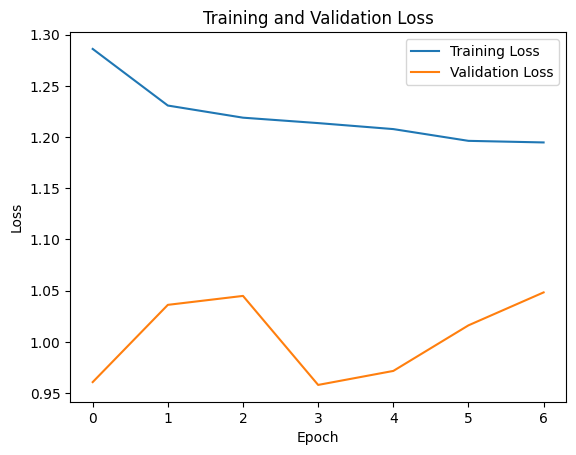

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_2['loss'], label = 'Training Loss')
plt.plot(history_2['val_loss'], label = 'Validation Loss')

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")

plt.legend()
plt.show()

In [ ]:
### Evaluation and Metrics


In [ ]:
from tqdm import tqdm_notebook
# fresh valid gen
valid_gen = flow_from_dataframe(valid_idg, valid_df,
                             path_col = 'path',
                            y_col = 'level_cat')
vbatch_count = (valid_df.shape[0]//batch_size-1)

out_size = vbatch_count*batch_size

test_X = np.zeros((out_size,)+t_x.shape[1:], dtype = np.float32)
test_Y = np.zeros((out_size,)+t_y.shape[1:], dtype = np.float32)

for i, (c_x, c_y) in zip(tqdm_notebook(range(vbatch_count)),
                         valid_gen):
    j = i*batch_size
    test_X[j:(j+c_x.shape[0])] = c_x
    test_Y[j:(j+c_x.shape[0])] = c_y

<ipython-input-90-2820fbb8aaf2>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, (c_x, c_y) in zip(tqdm_notebook(range(vbatch_count)),


  0%|          | 0/70 [00:00<?, ?it/s]

In [ ]:
# Retrieve saved best


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
pred_y = retina_model_finetune_first10.predict(test_X, batch_size = 32, verbose = True)

pred_Y_cat = np.argmax(pred_y, -1)
test_Y_cat = np.argmax(test_Y, -1)
print('Accuracy on Test Data: %2.2f%%' % (accuracy_score(test_Y_cat, pred_Y_cat)))
print(classification_report(test_Y_cat, pred_Y_cat))

70/70 [==============================] - 7s 80ms/step
Accuracy on Test Data: 0.58%
              precision    recall  f1-score   support

           0       0.76      0.71      0.73      1598
           1       0.00      0.00      0.00       193
           2       0.21      0.42      0.28       346
           3       0.00      0.00      0.00        62
           4       0.30      0.37      0.33        41

    accuracy                           0.58      2240
   macro avg       0.25      0.30      0.27      2240
weighted avg       0.58      0.58      0.57      2240



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

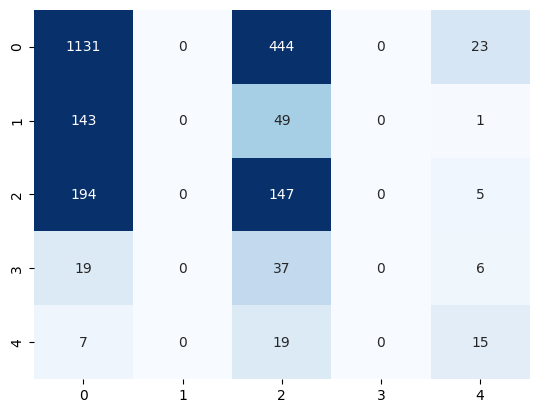

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_Y_cat, pred_Y_cat),
            annot=True, fmt="d", cbar = False, cmap = plt.cm.Blues, vmax = test_X.shape[0]//16)

## EfficientNetV2B1

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dropout, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetV2B1  # Import EfficientNetV2S or other variant
from tensorflow.keras.layers import BatchNormalization

#Turn on Mixed Precision Training
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Define input layer
in_lay = Input(t_x.shape[1:])  # Specify the input shape here

# Load pre-trained model
base_pretrained_model = EfficientNetV2B1(weights='imagenet', include_top=False, input_shape=t_x.shape[1:])  # Specify input shape here

# Unfreeze layers that are not BatchNormalization layers
base_pretrained_model.trainable = False

# Get the output features from the pre-trained model
pt_features = base_pretrained_model(in_lay)

# Global average pooling
gap_features = GlobalAveragePooling2D()(pt_features)

# Dropout and dense layers
gap_dr = Dropout(0.25)(gap_features)
dense_layer = Dense(128, activation='relu')(gap_dr)
dr_steps = Dropout(0.25)(dense_layer)

# Output layer
out_layer = Dense(5, activation='softmax', name = "output")(dr_steps)

# Create the model
retinav2_b1 = Model(inputs=in_lay, outputs=out_layer)

#Define topK Accuracy
from keras.metrics import top_k_categorical_accuracy

def top_2_accuracy(in_gt, in_pred):
    return top_k_categorical_accuracy(in_gt, in_pred, k=2)

#Use the focal loss function
import tensorflow as tf

# Define focal loss function
loss_fn = tf.keras.losses.CategoricalCrossentropy()

# Compile the model
retinav2_b1.compile(optimizer='adam',
                      loss= loss_fn,
                      metrics=['categorical_accuracy', top_2_accuracy])

# Print model summary
retinav2_b1.summary()

28456008/28456008 [==============================] - 0s 0us/step
Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 512, 512, 3)]     0         
                                                                 
 efficientnetv2-b1 (Functio  (None, 16, 16, 1280)      6931124   
 nal)                                                            
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
 0 (GlobalAveragePooling2D)                                      
                                                                 
 dropout_22 (Dropout)        (None, 1280)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               163968    
                                                           

In [ ]:
base_pretrained_model.summary()

In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau

weight_path="{}_weights.best.hdf5".format('retina')

# sampler = SampleBalancingCallback(train_gen, batch_size = batch_size)
checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1,
                             save_best_only=True, mode='min', save_weights_only = True)
reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, verbose=1, mode='auto', cooldown=5, min_lr=0.00001)
early = EarlyStopping(monitor="val_loss",
                      mode="min",
                      patience=3) # probably needs to be more patient
callbacks_list = [early, reduceLROnPlat, checkpoint]

In [ ]:
%%time
history_2 = retinav2_b1.fit(train_gen,
                           steps_per_epoch = downsampled_df.shape[0]//batch_size,
                           validation_data = valid_gen,
                           validation_steps = valid_df.shape[0]//batch_size,
                              epochs = 10,
                              callbacks = callbacks_list,
                             workers = 0, # tf-generators are not thread-safe
                             use_multiprocessing=False,
                             max_queue_size = 0,
                            verbose = 1
                            ).history

Epoch 1/10
103/103 [==============================] - ETA: 0s - loss: 1.2782 - categorical_accuracy: 0.4542 - top_2_accuracy: 0.7546
Epoch 1: val_loss improved from inf to 0.99398, saving model to retina_weights.best.hdf5
103/103 [==============================] - 187s 2s/step - loss: 1.2782 - categorical_accuracy: 0.4542 - top_2_accuracy: 0.7546 - val_loss: 0.9940 - val_categorical_accuracy: 0.7099 - val_top_2_accuracy: 0.8684 - lr: 0.0010
Epoch 2/10
103/103 [==============================] - ETA: 0s - loss: 1.2335 - categorical_accuracy: 0.4717 - top_2_accuracy: 0.7721
Epoch 2: val_loss did not improve from 0.99398
103/103 [==============================] - 170s 2s/step - loss: 1.2335 - categorical_accuracy: 0.4717 - top_2_accuracy: 0.7721 - val_loss: 1.0121 - val_categorical_accuracy: 0.6633 - val_top_2_accuracy: 0.8653 - lr: 0.0010
Epoch 3/10
103/103 [==============================] - ETA: 0s - loss: 1.2182 - categorical_accuracy: 0.4787 - top_2_accuracy: 0.7751
Epoch 3: val_loss i

In [ ]:
retina_model.save('retina_b1.h5')

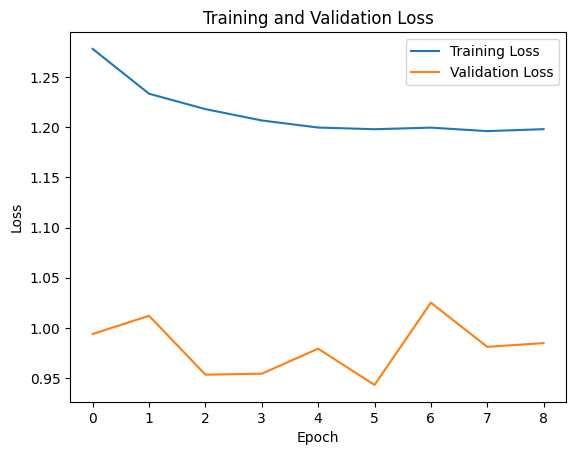

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_2['loss'], label = 'Training Loss')
plt.plot(history_2['val_loss'], label = 'Validation Loss')

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")

plt.legend()
plt.show()

In [ ]:
from tqdm import tqdm_notebook
# fresh valid gen
valid_gen = flow_from_dataframe(valid_idg, valid_df,
                             path_col = 'path',
                            y_col = 'level_cat')
vbatch_count = (valid_df.shape[0]//batch_size-1)

out_size = vbatch_count*batch_size

test_X = np.zeros((out_size,)+t_x.shape[1:], dtype = np.float32)
test_Y = np.zeros((out_size,)+t_y.shape[1:], dtype = np.float32)

for i, (c_x, c_y) in zip(tqdm_notebook(range(vbatch_count)),
                         valid_gen):
    j = i*batch_size
    test_X[j:(j+c_x.shape[0])] = c_x
    test_Y[j:(j+c_x.shape[0])] = c_y

<ipython-input-98-2820fbb8aaf2>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, (c_x, c_y) in zip(tqdm_notebook(range(vbatch_count)),


  0%|          | 0/70 [00:00<?, ?it/s]

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
pred_y = retina_model_finetune_first10.predict(test_X, batch_size = 32, verbose = True)

pred_Y_cat = np.argmax(pred_y, -1)
test_Y_cat = np.argmax(test_Y, -1)
print('Accuracy on Test Data: %2.2f%%' % (accuracy_score(test_Y_cat, pred_Y_cat)))
print(classification_report(test_Y_cat, pred_Y_cat))

70/70 [==============================] - 6s 80ms/step
Accuracy on Test Data: 0.58%
              precision    recall  f1-score   support

           0       0.76      0.71      0.73      1594
           1       0.00      0.00      0.00       188
           2       0.21      0.42      0.28       352
           3       0.00      0.00      0.00        63
           4       0.30      0.35      0.32        43

    accuracy                           0.58      2240
   macro avg       0.25      0.30      0.27      2240
weighted avg       0.58      0.58      0.57      2240



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

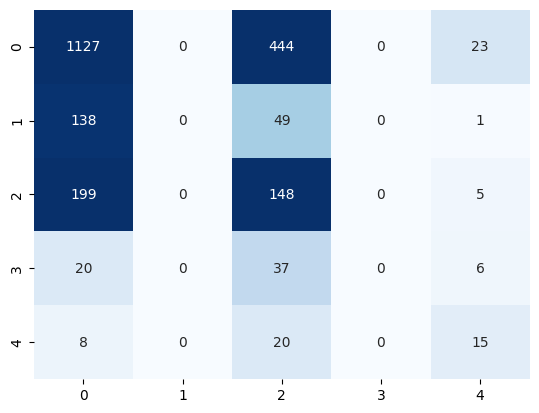

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_Y_cat, pred_Y_cat),
            annot=True, fmt="d", cbar = False, cmap = plt.cm.Blues, vmax = test_X.shape[0]//16)

#Ensemble Model

In [ ]:
from keras.models import load_model
import numpy as np
from tqdm import tqdm_notebook
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

def top_2_accuracy(y_true, y_pred):
    return keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k=2)

# Load models with custom metric function
loaded_model_b0 = load_model('retina_b0.h5', custom_objects={'top_2_accuracy': top_2_accuracy})
loaded_model_b1 = load_model('retina_b1.h5', custom_objects={'top_2_accuracy': top_2_accuracy})
loaded_model_s = load_model('retina_s_model.h5', custom_objects={'top_2_accuracy': top_2_accuracy})



In [ ]:
vbatch_count = (valid_df.shape[0]//batch_size-1)
out_size = vbatch_count*batch_size


test_X = np.zeros((out_size,)+t_x.shape[1:], dtype = np.float32)
test_Y = np.zeros((out_size,)+t_y.shape[1:], dtype = np.float32)

for i, (c_x, c_y) in zip(tqdm_notebook(range(vbatch_count)),
                         valid_gen):
    j = i*batch_size
    test_X[j:(j+c_x.shape[0])] = c_x
    test_Y[j:(j+c_x.shape[0])] = c_y

preds_b0 = loaded_model_b0.predict(test_X, batch_size = 32, verbose = True)
preds_b1 = loaded_model_b1.predict(test_X, batch_size = 32, verbose = True)




<ipython-input-23-97628b8debb2>:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, (c_x, c_y) in zip(tqdm_notebook(range(vbatch_count)),


  0%|          | 0/70 [00:00<?, ?it/s]

70/70 [==============================] - 16s 183ms/step


In [ ]:
from sklearn.ensemble import RandomForestClassifier
preds_b0_classes = np.argmax(preds_b0, axis=-1)
preds_b1_classes = np.argmax(preds_b1, axis=-1)
test_Y_cat = np.argmax(test_Y, -1)
stacked_features_test = np.hstack((preds_b0_classes[:, np.newaxis],
                                    preds_b1_classes[:, np.newaxis]))
# Define meta-regressor
meta_learner = RandomForestClassifier(n_estimators=100, random_state=42)
meta_learner.fit(stacked_features_test, np.argmax(test_Y, axis=-1))

# Predict using the meta learner
stacked_predictions = meta_learner.predict(stacked_features_test)


# Evaluate stacking regressor
print('Accuracy on Test Data: %2.2f%%' % (accuracy_score(test_Y_cat, stacked_predictions)))
print(classification_report(test_Y_cat, stacked_predictions))

Accuracy on Test Data: 0.71%
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      1598
           1       0.00      0.00      0.00       189
           2       0.00      0.00      0.00       352
           3       0.00      0.00      0.00        63
           4       0.00      0.00      0.00        38

    accuracy                           0.71      2240
   macro avg       0.14      0.20      0.17      2240
weighted avg       0.51      0.71      0.59      2240



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

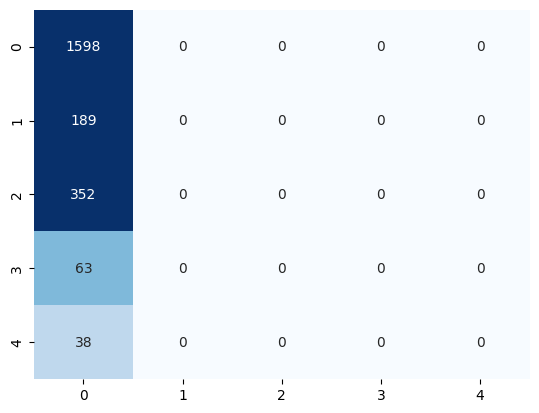

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_Y_cat, stacked_predictions),
            annot=True, fmt="d", cbar = False, cmap = plt.cm.Blues, vmax = test_X.shape[0]//16)